In [16]:
import os
import sys
import random
import math
import skimage.io

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

from skimage.color import rgb2gray
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import ndimage

ROOT_DIR = os.path.abspath("../OCR_capstone/Mask_RCNN-master/")
# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
from mrcnn.config import Config
from mrcnn.model import log
# Import COCO config
# sys.path.append(os.path.join(ROOT_DIR, "samples/coco/"))  # To find local version
# import coco

sys.path.append(os.path.join(ROOT_DIR, "samples/coco/"))  # To find local version
import coco

%matplotlib inline 

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Local path to trained weights file
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")
# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)


#from tensorflow.keras import backend

from keras.preprocessing import image


In [17]:
ROOT_DIR

'/Users/jamie/Desktop/DSI10/OCR_capstone/Mask_RCNN-master'

In [18]:
img = cv2.imread('./data/images/001.Black_footed_Albatross/Black_footed_Albatross_0002_2293084168.jpg',1)

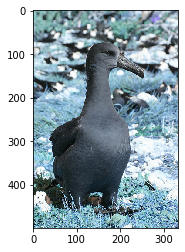

In [19]:
plt.imshow(img)

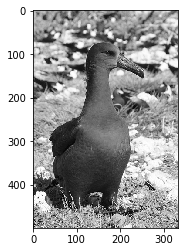

In [20]:
gray = rgb2gray(img)
plt.imshow(gray, cmap='gray')

In [21]:
# class myMaskRCNNConfig(Config):
#     # give the configuration a recognizable name
#     NAME = "MaskRCNN_config"
 
#     # set the number of GPUs to use along with the number of images
#     # per GPU
#     GPU_COUNT = 1
#     IMAGES_PER_GPU = 1
 
#     # number of classes (we would normally add +1 for the background)
#      # kangaroo + BG
#     NUM_CLASSES = 1+1
   
#     # Number of training steps per epoch
#     STEPS_PER_EPOCH = 131
    
#     # Learning rate
#     LEARNING_RATE=0.006
    
#     # Skip detections with < 90% confidence
#     DETECTION_MIN_CONFIDENCE = 0.9
    
#     # setting Max ground truth instances
#     MAX_GT_INSTANCES=10

In [29]:
class InferenceConfig(coco.CocoConfig):
    # Set batch size to 1 since we'll be running inference on
    # one image at a time. Batch size = GPU_COUNT * IMAGES_PER_GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                93
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

In [30]:
model = modellib.MaskRCNN(mode="inference",config=config,model_dir= os.path.join(ROOT_DIR, "logs")
)

# Load weights trained on MS-COCO
#model.load_weights(COCO_MODEL_PATH, by_name=True)

In [34]:
model.load_weights(COCO_MODEL_PATH, by_name=True)

In [35]:
result= model.detect([img])

In [36]:
class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']

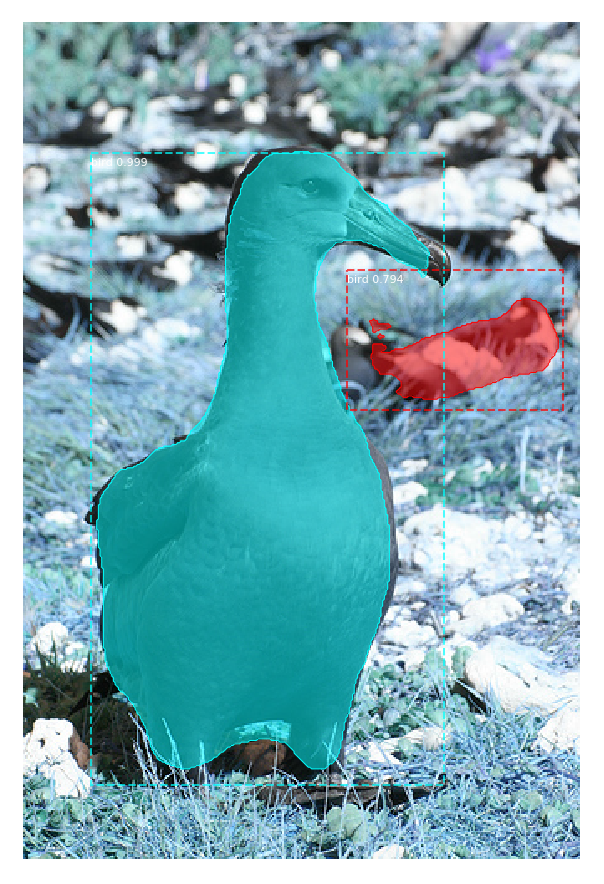

In [37]:
r = result[0]
visualize.display_instances(img, r['rois'], r['masks'], r['class_ids'], 
                            class_names, r['scores'])

In [41]:
r['rois']

array([[ 77,  40, 455, 251],
       [147, 193, 231, 322]], dtype=int32)

In [43]:
r.keys()

dict_keys(['rois', 'class_ids', 'scores', 'masks'])